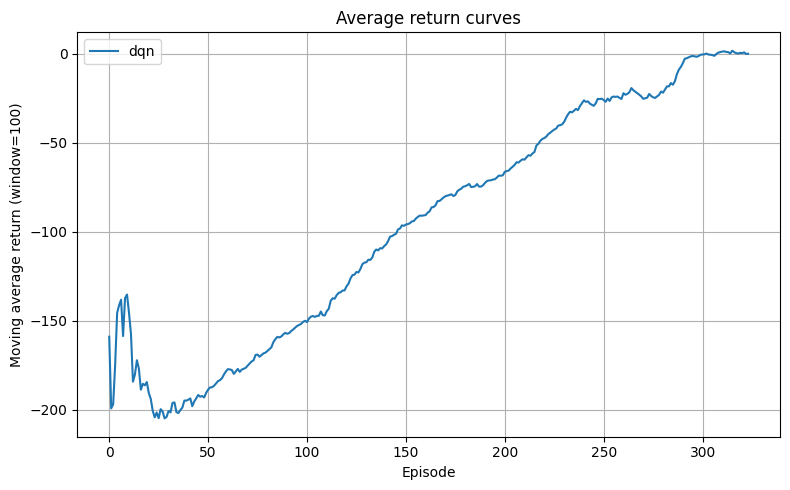

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
from typing import List

from DQN import ExperimentResult, DQNConfig, train_loop

def plot_avg_return(results: List[ExperimentResult]):
    """Plot moving-average return curves for one or more experiments.

    results: a list of ExperimentResult objects, e.g.
        [result_dqn, result_double, result_dueling]
    """
    plt.figure(figsize=(8, 5))

    for res in results:
        steps = range(len(res.moving_avg_returns))
        label = f"{res.variant}"
        plt.plot(steps, res.moving_avg_returns, label=label)

    plt.xlabel("Episode")
    plt.ylabel("Moving average return (window=100)")
    plt.title("Average return curves")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


env = gym.make("LunarLander-v3")

config = DQNConfig()

result_dqn, agent_dqn = train_loop(env, config, variant="dqn")

env.close()

plot_avg_return([result_dqn])


In [7]:
from evaluation import evaluate_policy

env = gym.make("LunarLander-v3")
env.reset()

metrics_random = evaluate_policy(env, agent_dqn.select_deterministic_action, num_episodes=10, seed=0)
print("Random policy metrics:")
for k, v in metrics_random.items():
    print(f"{k}: {v}")

env.close()


Random policy metrics:
num_episodes: 10
mean_return: -12.885899543762207
std_return: 17.960847854614258
min_return: -37.765689849853516
max_return: 12.899340629577637
solved_rate: 0.0
success_rate: 0.0
crash_rate: 0.0
timeout_rate: 1.0
other_terminal_rate: 0.0
mean_episode_length: 1000.0
mean_main_engine_usage: 153.5
mean_side_engine_usage: 727.9
num_success_episodes: 0
mean_final_abs_x_success: None
mean_final_abs_vy_success: None
mean_final_abs_angle_success: None
